# references
* http://snappishproductions.com/blog/2018/01/03/class-activation-mapping-in-pytorch.html
* https://software.intel.com/en-us/articles/visualising-cnn-models-using-pytorch

In [1]:
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms
from torch.nn import functional as F
from torch import topk
import numpy as np
import skimage.transform
import torch

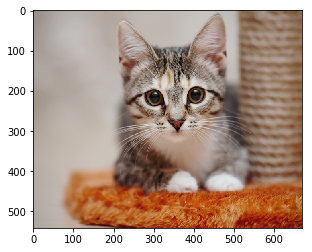

In [2]:
image = Image.open('./cat.jpg')
imshow(image)

In [3]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

In [4]:
display_transform = transforms.Compose([
    transforms.Resize((224, 224))
])

In [5]:
tensor = preprocess(image)

In [6]:
tensor = tensor.unsqueeze(0)

In [7]:
tensor.shape

torch.Size([1, 3, 224, 224])

In [8]:
model = models.resnet18(pretrained=True)

In [9]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [10]:
class SaveFeatures():
    features = None
    def __init__(self, m):
        # register a hook  to save features
        self.hook = m.register_forward_hook(self.hook_fn)
    
    def hook_fn(self, module, input, output):
        # save features
        self.features =(output.to('cpu').data).numpy()
                        
    def remove(self):
        self.hook.remove()

In [11]:
# instance variable ._modules
model._modules['layer4']

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, mome

In [12]:
# get はキーが存在しない場合に，None を返す．
final_layer = model._modules.get('layer4')

In [13]:
final_layer

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, mome

In [14]:
# hook 使って，特徴量を保存
activated_features = SaveFeatures(final_layer)

In [15]:
print(activated_features.features)

None


In [16]:
prediction = model(tensor)

In [17]:
print(activated_features.features)

[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.05076954 0.02056932 ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.0246233  0.         ... 0.         0.08357385
    0.15109557]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.11361316 0.         ... 0.         0.
    0.        ]
   ...
   [0.3148343  0.37746483 0.17843038 ... 0.         0.
    0.        ]
   [0.5124525  1.0769176  1.6202146  ... 1.9582816  1.6250023
    0.6833427 ]
   [0.         0.         0.         ... 0.87323534 1.4432032
    1.1653723 ]]

  [[0.05557096 1.0437689  0.49231887 ... 1.1340954  1.942512
    0.97796685]
   [0.6378166  1.1314535  1.677

In [18]:
pred_probabilities = F.softmax(prediction, dim=1).squeeze()

In [19]:
topk(pred_probabilities, 1)

(tensor([0.4167], grad_fn=<TopkBackward>), tensor([281]))

In [20]:
def getCAM(feature_conv, weight_fc, class_idx):
    # feature map のサイズ
    _, nc, h, w = feature_conv.shape
    
    cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w)))
    cam = cam.reshape(h, w)
    # 正規化　なんでするの？ => 画像化するため？
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    
    # numpy で出力
    return [cam_img]

In [21]:
weight_softmax_params = list(model._modules.get('fc').parameters())

In [22]:
# weight_softmax_params[1] はバイアス
# ここでは，weight_softmax_params[0] 重みだけを考慮
# requires_grad = True の場合，そのままnumpy にできないので，dataを用いる
weight_softmax = np.squeeze(weight_softmax_params[0].to('cpu').data.numpy())

In [23]:
weight_softmax.shape

(1000, 512)

In [24]:
class_idx = topk(pred_probabilities, 1)[1].int()

In [25]:
class_idx

tensor([281], dtype=torch.int32)

In [26]:
# overlay => 何かの表面を覆うもの
overlay = getCAM(activated_features.features, weight_softmax, class_idx)

In [27]:
overlay[0]

array([[0.00311887, 0.02164788, 0.1617374 , 0.21537685, 0.24051073,
        0.12847553, 0.06693773],
       [0.00516575, 0.15357459, 0.38084936, 0.51854885, 0.49121997,
        0.27660164, 0.14290921],
       [0.0335422 , 0.3248006 , 0.5928898 , 0.85192096, 0.6788334 ,
        0.40474394, 0.1846905 ],
       [0.03914253, 0.408499  , 0.6783008 , 1.        , 0.75490516,
        0.44742787, 0.17157882],
       [0.03629366, 0.30567458, 0.50051636, 0.7259518 , 0.5554321 ,
        0.35621864, 0.11926794],
       [0.03652048, 0.14512958, 0.27670452, 0.42239857, 0.33640295,
        0.2089638 , 0.07389249],
       [0.02014575, 0.031955  , 0.07905335, 0.1220577 , 0.11046321,
        0.05234955, 0.        ]], dtype=float32)

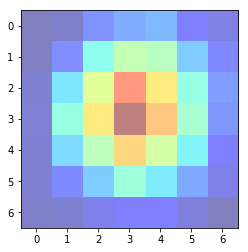

In [28]:
imshow(overlay[0], alpha=0.5, cmap='jet')

/anaconda3/envs/torch/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/envs/torch/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


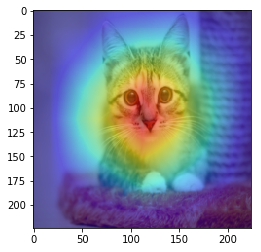

In [29]:
imshow(display_transform(image))
imshow(skimage.transform.resize(overlay[0], tensor.shape[2:4]), alpha=0.5, cmap='jet')